In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
pd.set_option('display.float_format', '{:.2f}'.format)
train_df = pd.read_csv("train.csv", parse_dates=['fecha'])

# train.csv

* **id** - 254099, **Entero**
* **titulo** - "condominio horizontal...", **string**
* **descripcion** - "lo que sea", **String**
* **tipoDePropiedad** - Apartamento-Casa en condominio, **debería ser tipo en enum**
* **direccion** - "av. mexico", **String**
* **ciudad** - "Benito Juarez", **String**
* **provincia** - "Distrito Federal", **String**
* **metrostotales** Metros totales de la propiedad, **Int**
* **metroscubiertos** Metros cubiertos de la propiedad, **Int**
* **antiguedad** - 10.0, Años **Decimal**
* **habitaciones** - 2.0, **Decimal**
* **garages** -  1.0, **Decimal**
* **idZona** - 23533.0, **Decimal**
* **lat** - 19.310205, **muchos numeros después de la coma**
* **ing** - -99.227655, **esto es la long**
* **fecha** - 2015-08-23 00:00:00, es un **datetime**
* **gimnasio** - 1.0 o 0.0, **verdadero o falso**
* **usosMultiples** - 1.0 o 0.0, **verdadero o falso**
* **piscina** - 1.0 o 0.0, **verdadero o falso**
* **escuelasCercanas** - 1.0 o 0.0, **verdadero o falso**
* **precio** - 2273000.0, en pesos Mexicanos

In [4]:
train_df.dtypes

id                                     int64
titulo                                object
descripcion                           object
tipodepropiedad                       object
direccion                             object
ciudad                                object
provincia                             object
antiguedad                           float64
habitaciones                         float64
garages                              float64
banos                                float64
metroscubiertos                      float64
metrostotales                        float64
idzona                               float64
lat                                  float64
lng                                  float64
fecha                         datetime64[ns]
gimnasio                             float64
usosmultiples                        float64
piscina                              float64
escuelascercanas                     float64
centroscomercialescercanos           float64
precio    

# ---------------------------------------------

Voy a filtrar todo lo que no sea una **Casa**

In [5]:
casas = train_df.loc[train_df["tipodepropiedad"] == "Casa"]

Voy a ver si encuentro algun atributo donde haya cantidades parejas, y ver si hay alguna diferencia notable en los precios

## ----------------------------------------------------------------------------------------------

## BoxPlot de precios para casas 
### Voy a probar filtrando y agrupando por las distintas caracteristicas comparando entre casas

In [6]:
casas = casas.dropna()

* ### Piscina (Supongo que es inutil, por la diferencia de cantidades)

In [28]:
casaPrecioPiscina = casas.iloc[:, [5, 19,22]]
casaPrecioPiscina.head()

,ciudad,piscina,precio
3,Zinacantepec,0.00,650000.00
7,Playa del Carmen,0.00,4200000.00
12,Querétaro,0.00,1500000.00
16,Querétaro,0.00,2450000.00
31,Puebla,0.00,1450000.00


/home/lucasotero/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Text(0, 0.5, 'Cantidad')

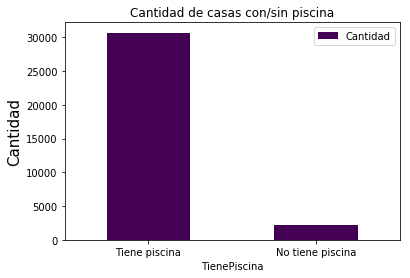

In [42]:
casasConPiscinaCount = casaPrecioPiscina.groupby(casaPrecioPiscina["piscina"]).agg({"count"}).reset_index()
casasConPiscinaCount = casasConPiscinaCount.iloc[: ,[1, 2]]
casasConPiscinaCount.columns = ["TienePiscina", "Cantidad"]
casasConPiscinaCount.TienePiscina[0] = "Tiene piscina"
casasConPiscinaCount.TienePiscina[1] = "No tiene piscina"
casasConPiscinaCount.plot.bar(x="TienePiscina", y="Cantidad", rot=0, title = "Cantidad de casas con/sin piscina",colormap='viridis').set_ylabel("Cantidad", fontsize=15)

In [49]:
casaPrecioPiscina["piscina"] = casaPrecioPiscina["piscina"].map(lambda x : "Tiene piscina" if x == 1 else "No tiene piscina")

/home/lucasotero/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Precios de casas con y sin piscina')

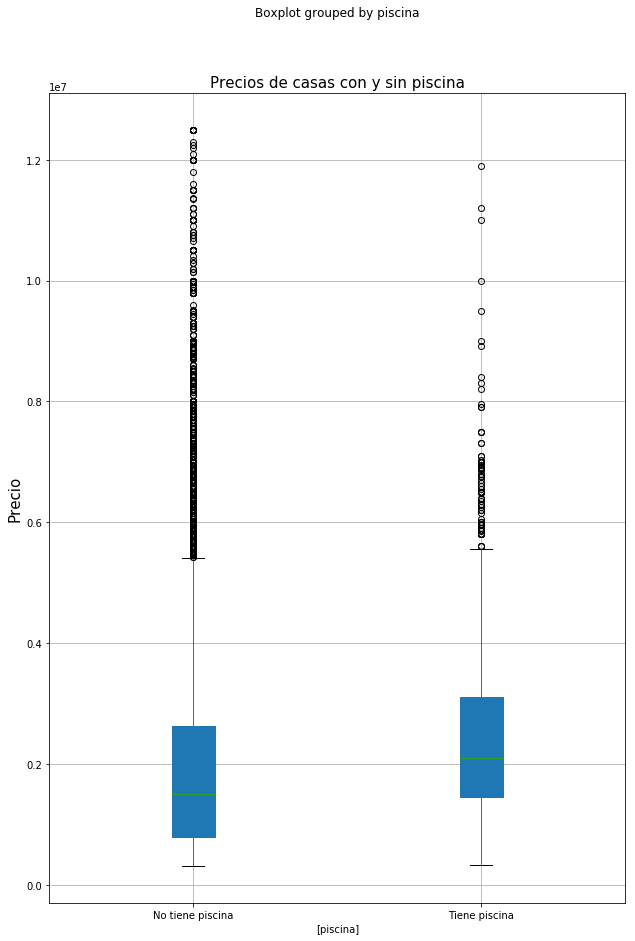

In [51]:
casaPrecioPiscinaBoxPlot = casaPrecioPiscina.boxplot(column=["precio"],patch_artist=True, figsize=(10,15), by=["piscina"])
casaPrecioPiscinaBoxPlot.set_ylabel("Precio", fontsize=15)
casaPrecioPiscinaBoxPlot.set_title("Precios de casas con y sin piscina", fontsize=15)

Aunque haga un boxplot, la diferencia de cantidad de casas para un grupo y otro es muy grande, creo que no es comparable

* ### Escuelas cercanas (Inutil, cantidades parecidas, pero los precios son casi iguales)

In [52]:
casaPrecioEscuela = casas.iloc[:, [5, 20, 22]]
casaPrecioEscuela.head()

,ciudad,escuelascercanas,precio
3,Zinacantepec,1.00,650000.00
7,Playa del Carmen,0.00,4200000.00
12,Querétaro,1.00,1500000.00
16,Querétaro,1.00,2450000.00
31,Puebla,1.00,1450000.00


/home/lucasotero/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Text(0, 0.5, 'Cantidad')

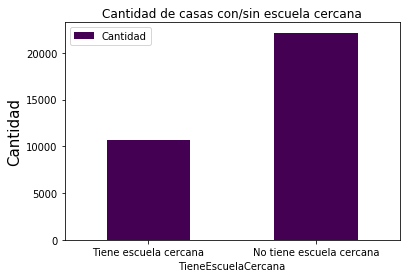

In [56]:
casasConEscuelaCercaCount = casaPrecioEscuela.groupby(casaPrecioEscuela["escuelascercanas"]).agg({"count"}).reset_index()
casasConEscuelaCercaCount = casasConEscuelaCercaCount.iloc[:, [0,1]]
casasConEscuelaCercaCount.columns = ["TieneEscuelaCercana", "Cantidad"]
casasConEscuelaCercaCount.TieneEscuelaCercana[0] = "Tiene escuela cercana"
casasConEscuelaCercaCount.TieneEscuelaCercana[1] = "No tiene escuela cercana"
casasConEscuelaCercaCount.plot.bar(x="TieneEscuelaCercana", y="Cantidad", rot=0, title = "Cantidad de casas con/sin escuela cercana",colormap='viridis').set_ylabel("Cantidad", fontsize=15)

Las cantidades son mucho más parecidas

In [57]:
casaPrecioEscuela["escuelascercanas"] = casaPrecioEscuela["escuelascercanas"].map(lambda x : "Tiene escuela cercana" if x == 1 else "No tiene escuela cercana")

/home/lucasotero/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Precios de casas con y sin escuelas cercanas')

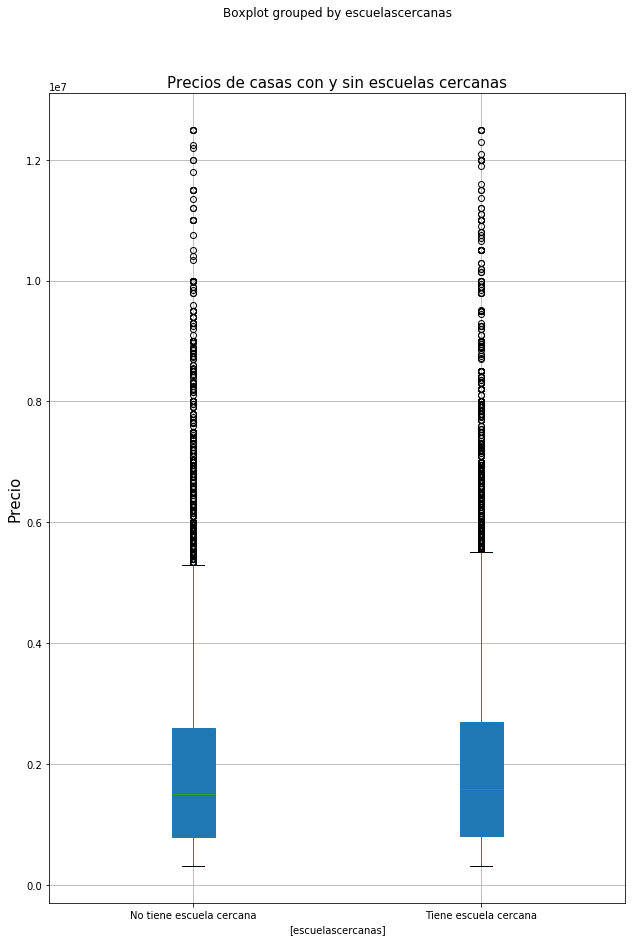

In [59]:
casaPrecioEscuelaBoxPlot = casaPrecioEscuela.boxplot(column=["precio"],patch_artist=True, figsize=(10,15), by=["escuelascercanas"])
casaPrecioEscuelaBoxPlot.set_ylabel("Precio", fontsize=15)
casaPrecioEscuelaBoxPlot.set_title("Precios de casas con y sin escuelas cercanas", fontsize=15)

Si supuse que el anterior era inútil...

* ### Gimnasio (Inutil como el primero)

In [13]:
casaPrecioGimnasio = casas.iloc[:, [5,17,22]]
casaPrecioGimnasio = casaPrecioGimnasio.loc[casaPrecioGimnasio["ciudad"] == "Zapopan"]
casaPrecioGimnasio.head()

,ciudad,gimnasio,precio
120,Zapopan,0.00,990000.00
203,Zapopan,0.00,623000.00
234,Zapopan,0.00,1740000.00
298,Zapopan,0.00,2200000.00
361,Zapopan,0.00,2670000.00


Text(0, 0.5, 'Cantidad')

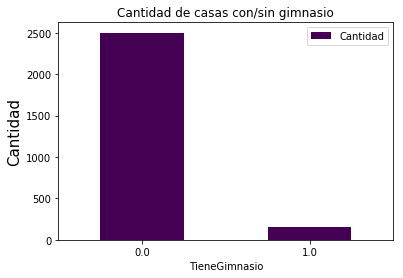

In [14]:
casasConGimnasioCount = casaPrecioGimnasio.groupby(casaPrecioGimnasio["gimnasio"]).agg({"count"}).reset_index()
casasConGimnasioCount = casasConGimnasioCount.iloc[:, [0,1]]
casasConGimnasioCount.columns = ["TieneGimnasio", "Cantidad"]
casasConGimnasioCount.plot.bar(x="TieneGimnasio", y="Cantidad", rot=0, title = "Cantidad de casas con/sin gimnasio",colormap='viridis').set_ylabel("Cantidad", fontsize=15)

Era obvio igual que iba a pasar esto...

* ### Usos multiples (Ni lo hago porque esto es más de edificio)

## Precio de casas por ciudad 
### Voy a ver las cantidades para ver si hay cosas comparables

In [15]:
casaPrecioCiudad = casas.iloc[:, [5,22]]
casaPrecioCiudad.head()

,ciudad,precio
3,Zinacantepec,650000.00
7,Playa del Carmen,4200000.00
12,Querétaro,1500000.00
16,Querétaro,2450000.00
31,Puebla,1450000.00


In [16]:
groupCiudadCant = casaPrecioCiudad.groupby(casaPrecioCiudad["ciudad"]).agg("count").reset_index()
groupCiudadCant.columns = ["ciudad", "cantidad"]
groupCiudadCant.head()

,ciudad,cantidad
0,Abasolo,1
1,Acambay,1
2,Acapulco de Juárez,91
3,Acolman,13
4,Agua Prieta,1


In [17]:
groupCiudadCant.shape

(392, 2)

Osea, hay 392 ciudades distintas (limpie nans), buenisimo, el grafico de abajo sale perfecto entonces

**No se entiende nada**, pero parece que hay muchas que tienen **muy pocas publicaciones** y otras bastantes más, voy a ver como las encuentro.

Mejor, pero quiero poder leer los nombres a simple vista, luego veo que hacer con todas las ciudades

Text(0, 0.5, 'Cantidad')

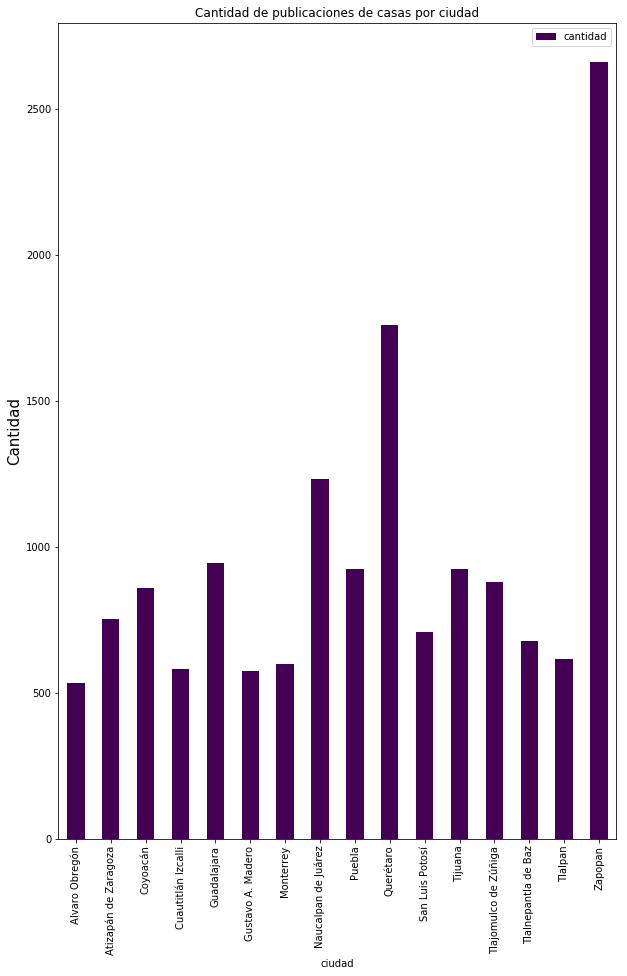

In [18]:
groupCiudadCant.loc[groupCiudadCant["cantidad"] > 500].plot.bar(x="ciudad", y="cantidad", rot=90, title = "Cantidad de publicaciones de casas por ciudad",colormap='viridis', figsize=(10,15)).set_ylabel("Cantidad", fontsize=15)

In [19]:
ciudadPrecioCantidadGroup = casaPrecioCiudad.groupby(casaPrecioCiudad["ciudad"]).agg({"precio": "count"}).reset_index()
ciudadPrecioCantidadGroup.columns = ["ciudad", "cantidad"]
ciudadPrecioCantidadGroup = ciudadPrecioCantidadGroup.loc[groupCiudadCant["cantidad"] > 800]
ciudadPrecioCantidadGroup.head()

,ciudad,cantidad
85,Coyoacán,858
120,Guadalajara,944
194,Naucalpan de Juárez,1231
227,Puebla,924
232,Querétaro,1759


In [20]:
CasaPrecioCiudadCantidad = casaPrecioCiudad.merge(ciudadPrecioCantidadGroup, how="right", on = "ciudad")
display(CasaPrecioCiudadCantidad.head())

,ciudad,precio,cantidad
0,Querétaro,1500000.00,1759
1,Querétaro,2450000.00,1759
2,Querétaro,3500000.00,1759
3,Querétaro,3500000.00,1759
4,Querétaro,1760000.00,1759


Text(0.5, 1.0, 'Precios de casas en distintas ciudades')

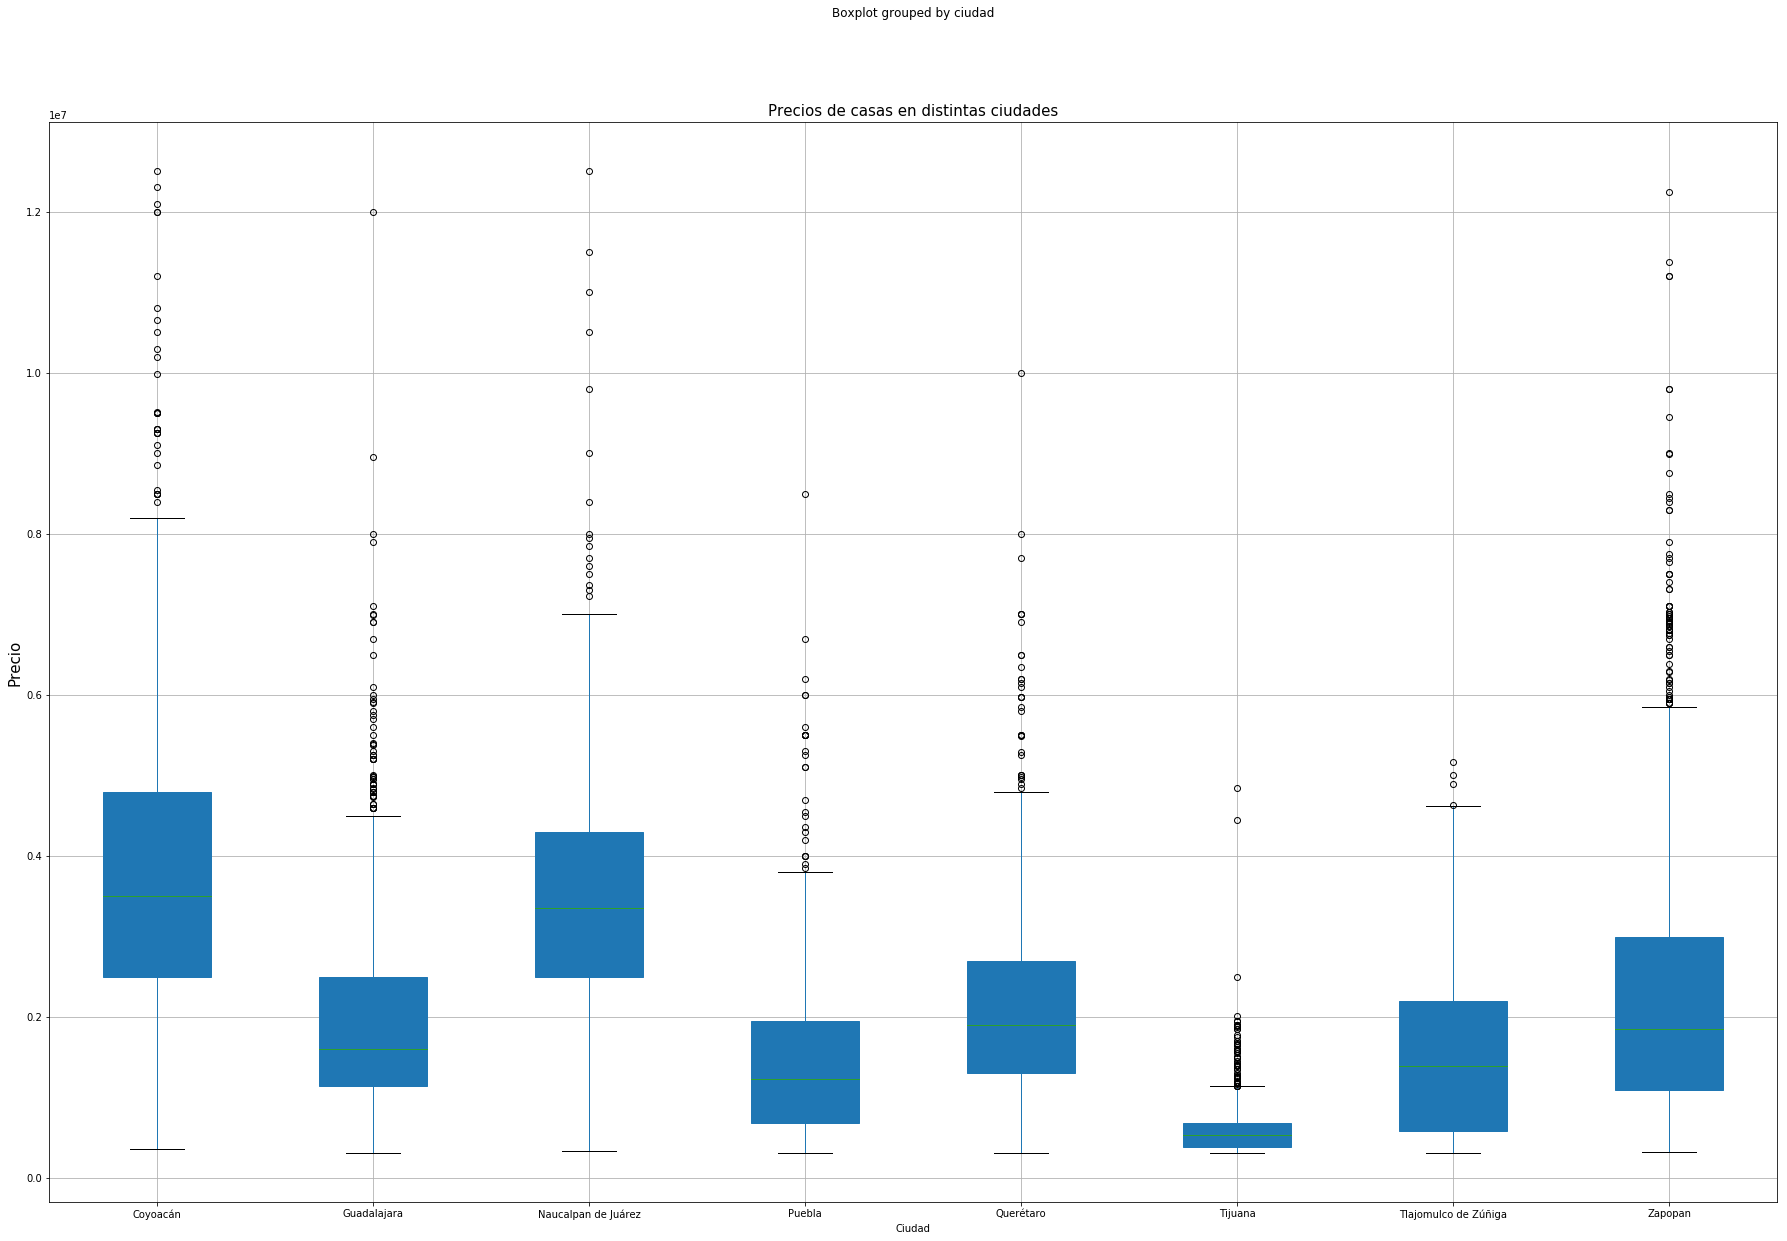

In [21]:
casaPrecioCiudadBoxPlot = CasaPrecioCiudadCantidad.boxplot(column=["precio"],rot = 0, patch_artist=True, figsize=(30,20), by=["ciudad"])
casaPrecioCiudadBoxPlot.set_xlabel("Ciudad")
casaPrecioCiudadBoxPlot.set_ylabel("Precio", fontsize=15)
casaPrecioCiudadBoxPlot.set_title("Precios de casas en distintas ciudades", fontsize=15)

## ¿El precio está relacionado a la cantidad de publicaciones?

In [22]:
CasaPrecioCiudadCantidad.head()

,ciudad,precio,cantidad
0,Querétaro,1500000.00,1759
1,Querétaro,2450000.00,1759
2,Querétaro,3500000.00,1759
3,Querétaro,3500000.00,1759
4,Querétaro,1760000.00,1759


In [23]:
CasaPrecioCiudadCantidad["precio"].corr(CasaPrecioCiudadCantidad["cantidad"])

0.03596103261489865

**Parece que no se relaciona el precio con la cantidad**

## Ciudad con precio más caro por metro cuadrado

In [24]:
casaPrecioMetroCuadrado = casas.iloc[:, [5,22, 12]]
casaPrecioMetroCuadrado['PrecioPorMetroCuadrado'] = np.divide(casaPrecioMetroCuadrado['precio'], casaPrecioMetroCuadrado['metrostotales'])
casaPrecioMetroCuadrado.nlargest(10, "PrecioPorMetroCuadrado")

/home/lucasotero/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ciudad,precio,metrostotales,PrecioPorMetroCuadrado
238470,Benito Juárez,9500000.00,53.00,179245.28
16689,Miguel Hidalgo,9500000.00,77.00,123376.62
172820,Querétaro,4280000.00,37.00,115675.68
108072,Ensenada,2695000.00,24.00,112291.67
1494,Benito Juárez,7200000.00,70.00,102857.14
160663,Cuauhtémoc,10750000.00,110.00,97727.27
103319,Cuauhtémoc,5250000.00,55.00,95454.55
237446,Benito Juárez,9500000.00,100.00,95000.00
121221,Benito Juárez,6050000.00,64.00,94531.25
110472,Mérida,1850000.00,20.00,92500.00


Text(0.5, 1.0, 'Precios por metro cuadrado en distintas ciudades')

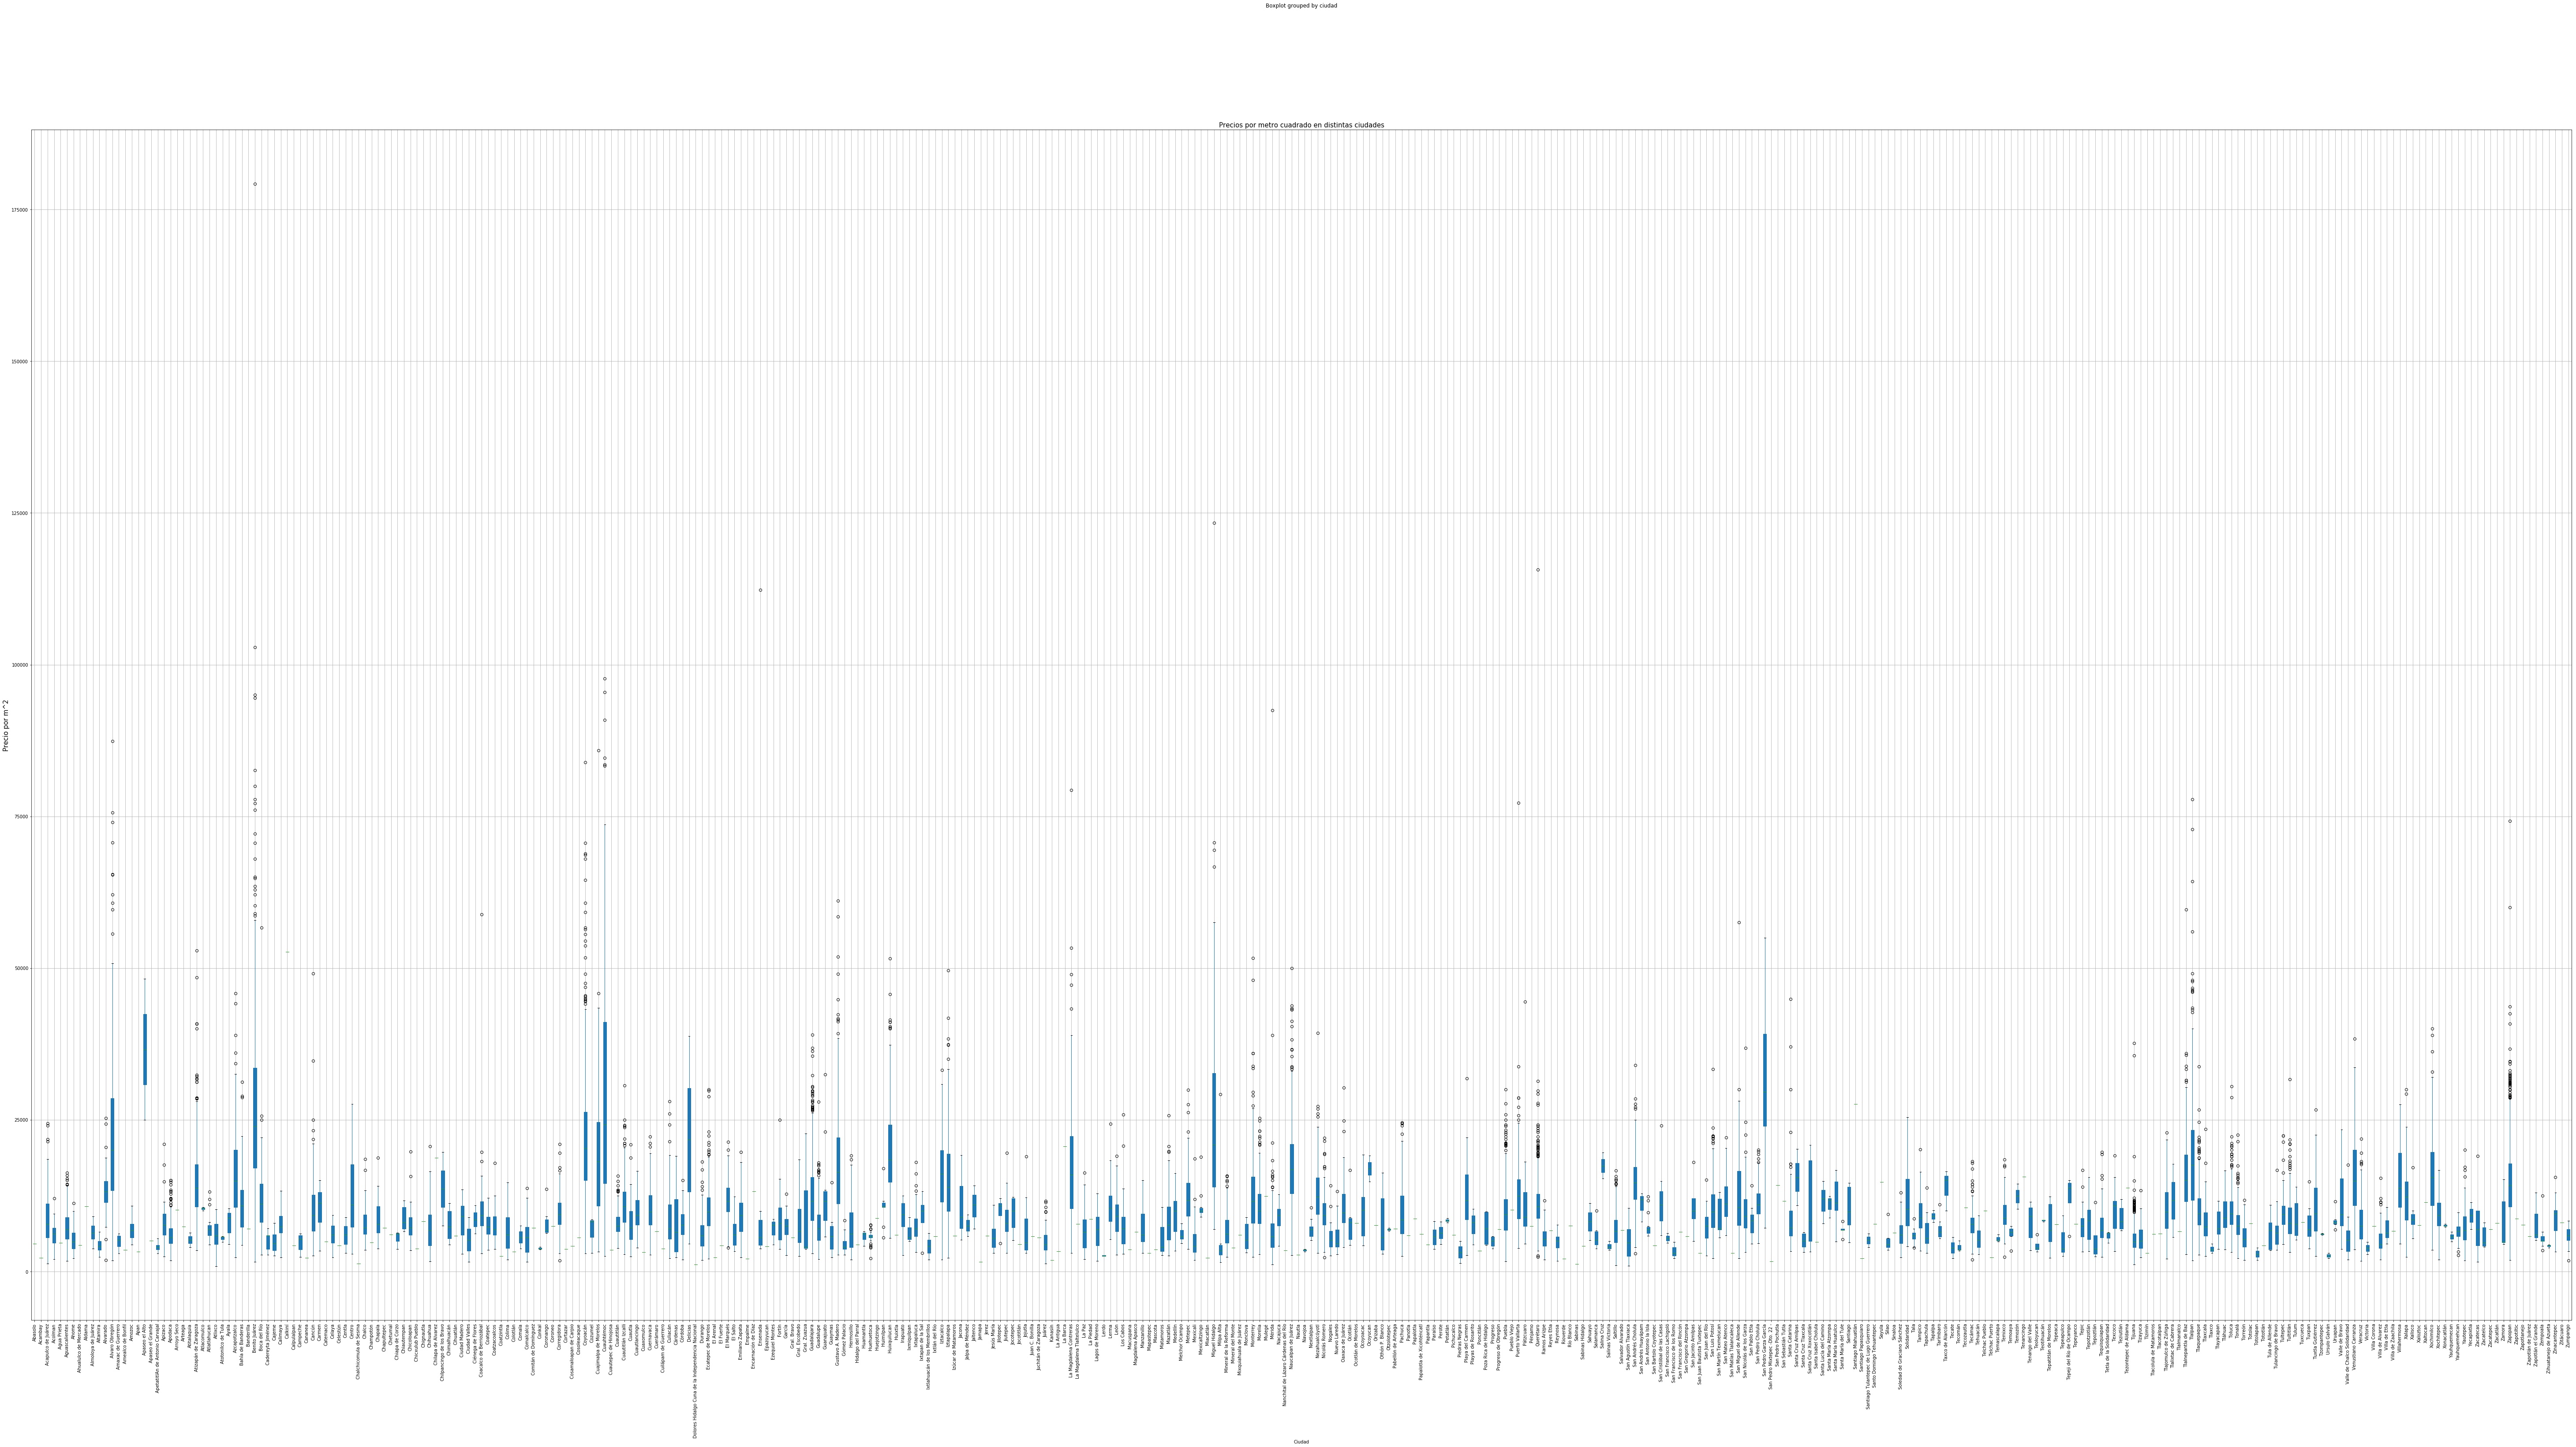

In [25]:
casaPrecioMetroCuadradoBoxPlot = casaPrecioMetroCuadrado.boxplot(column=["PrecioPorMetroCuadrado"],rot = 90, patch_artist=True, figsize=(100,50), by=["ciudad"])
casaPrecioMetroCuadradoBoxPlot.set_xlabel("Ciudad")
casaPrecioMetroCuadradoBoxPlot.set_ylabel("Precio por m^2", fontsize=15)
casaPrecioMetroCuadradoBoxPlot.set_title("Precios por metro cuadrado en distintas ciudades", fontsize=15)

Hay algunas ciudades que están por arriba de otras en terminos de precios, habrá que encontrar una manera de rankearlas

## Scatter plot precio por latitud

In [26]:
casaPrecioLat = casas.iloc[:, [22, 14, 15]]
casaPrecioLat.head()

,precio,lat,lng
3,650000.00,19.30,-99.69
7,4200000.00,20.67,-87.04
12,1500000.00,20.68,-100.32
16,2450000.00,20.71,-100.46
31,1450000.00,18.97,-98.24


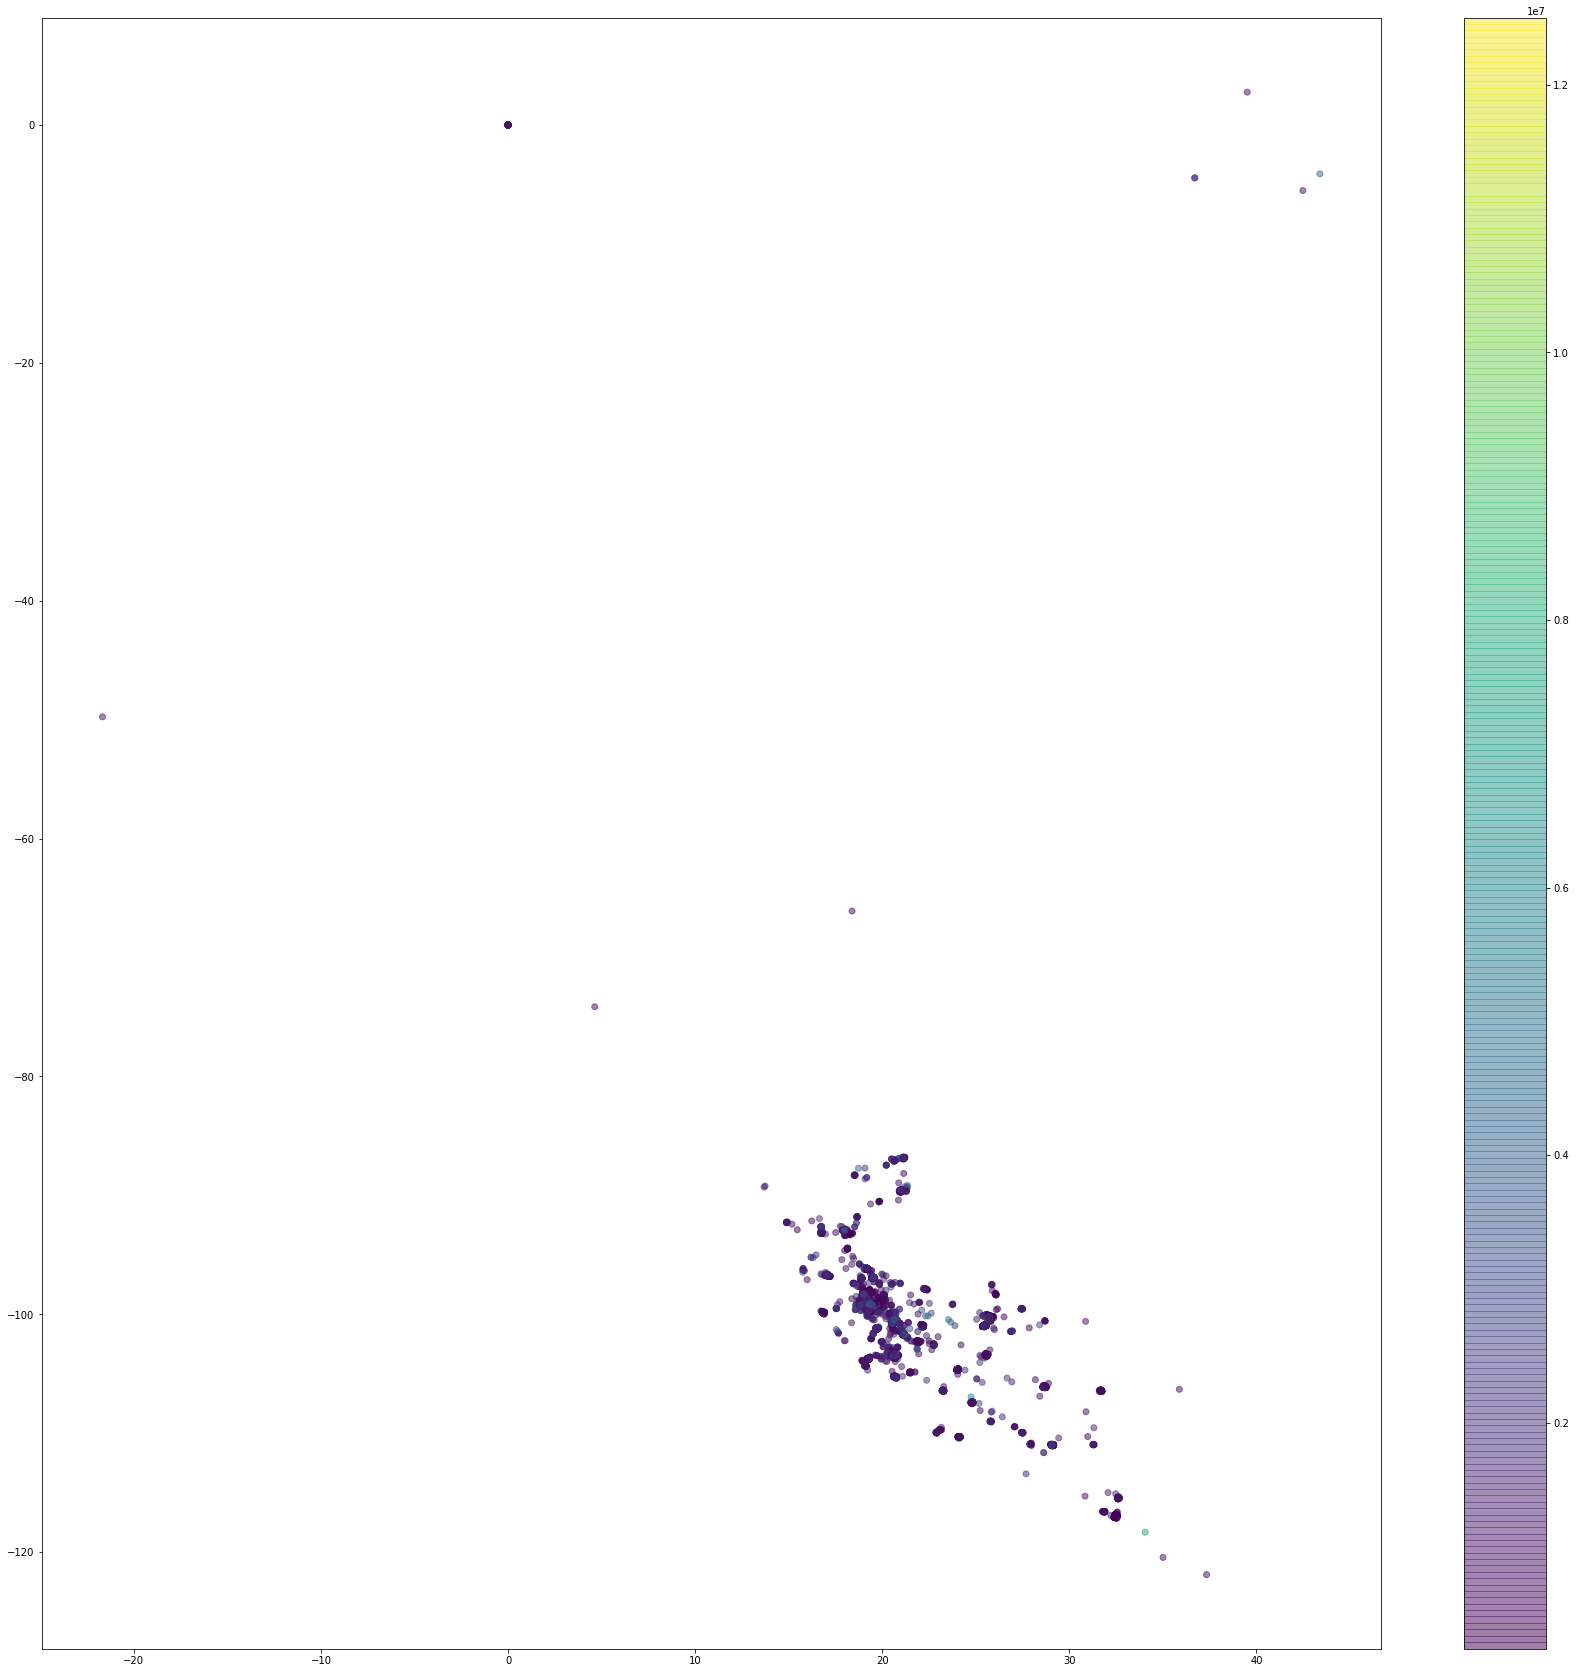

In [27]:
plt.figure(figsize=(30,30))
plt.scatter(casaPrecioLat["lat"], casaPrecioLat["lng"], c=casaPrecioLat["precio"],alpha=0.5)
plt.colorbar()
plt.show()

Esto aporta nada